Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
<br>
Salary_hike -> Build a prediction model for Salary_hike


In [61]:
import pandas as pd
import seaborn as sns

In [62]:
data = pd.read_csv("Salary_Data.csv")

In [63]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA And Data Visualization.

In [64]:
data.shape

(30, 2)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [66]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [67]:
data.duplicated().sum() #there are no duplicates in data set

0

In [68]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


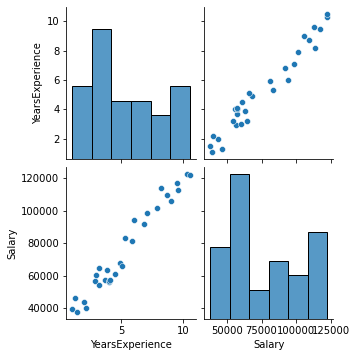

In [69]:
sns.pairplot(data)

### Log And SQRT Transformation:- 

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


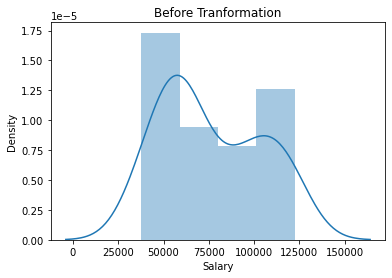

In [70]:
import numpy as np
import matplotlib.pyplot as plt
sns.distplot(data["Salary"])
plt.title("Before Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


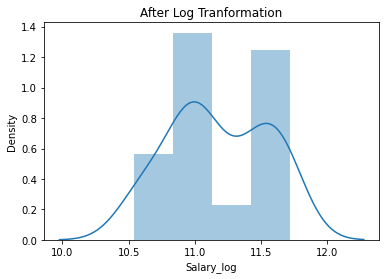

In [71]:
data["Salary_log"] = np.log(data["Salary"])
sns.distplot(data["Salary_log"])
plt.title("After Log Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


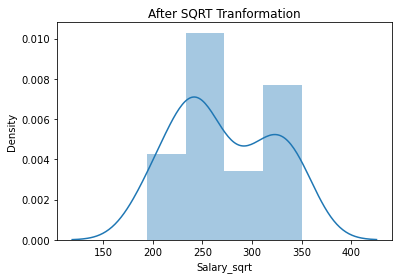

In [72]:
data["Salary_sqrt"] = np.sqrt(data["Salary"])
sns.distplot(data["Salary_sqrt"])
plt.title("After SQRT Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


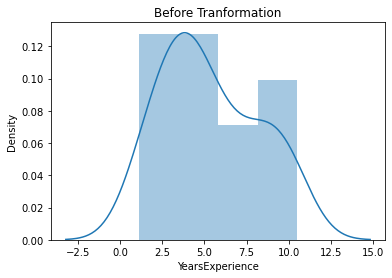

In [73]:
sns.distplot(data["YearsExperience"])
plt.title("Before Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


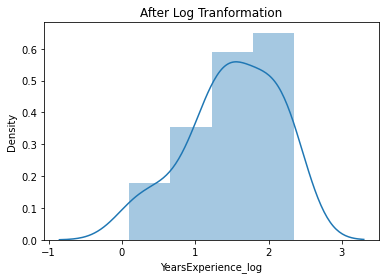

In [74]:
data["YearsExperience_log"] = np.log(data["YearsExperience"])
sns.distplot(data["YearsExperience_log"])
plt.title("After Log Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


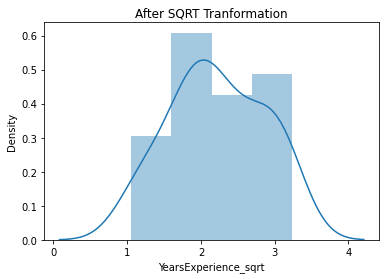

In [75]:
data["YearsExperience_sqrt"] = np.sqrt(data["YearsExperience"])
sns.distplot(data["YearsExperience_sqrt"])
plt.title("After SQRT Tranformation")
plt.show()

In [76]:
data.head()

,YearsExperience,Salary,Salary_log,Salary_sqrt,YearsExperience_log,YearsExperience_sqrt
0,1.1,39343.0,10.580073,198.350700,0.095310,1.048809
1,1.3,46205.0,10.740843,214.953483,0.262364,1.140175
2,1.5,37731.0,10.538237,194.244691,0.405465,1.224745
3,2.0,43525.0,10.681091,208.626460,0.693147,1.414214
4,2.2,39891.0,10.593906,199.727314,0.788457,1.483240


# Simple Linear Regression Model

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

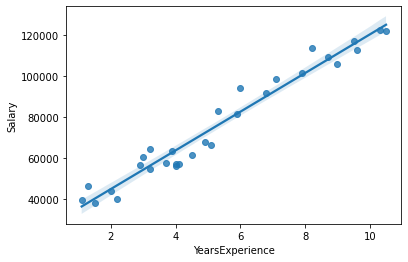

In [77]:
import statsmodels.formula.api as smf
model = smf.ols("Salary ~ YearsExperience",data = data).fit()
sns.regplot(x="YearsExperience",y="Salary",data = data)

In [78]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        13:50:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='YearsExperience_log', ylabel='Salary_log'>

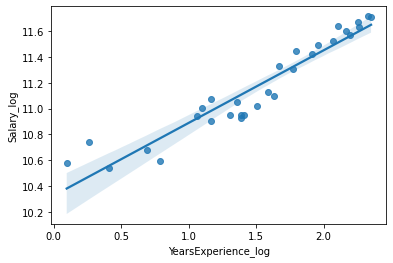

In [79]:
model_log = smf.ols("Salary_log ~ YearsExperience_log",data = data).fit()
sns.regplot(x="YearsExperience_log",y="Salary_log",data = data)

In [80]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_log   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           7.40e-16
Time:                        13:51:34   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.3280      0.056    184.868      0.000      10.214      10.442
YearsExperience_log     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='YearsExperience_sqrt', ylabel='Salary_sqrt'>

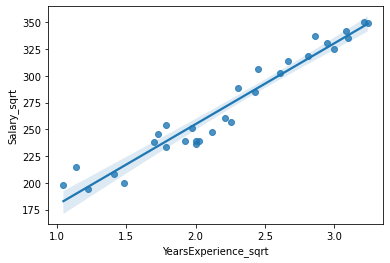

In [81]:
model_sqrt = smf.ols("Salary_sqrt ~ YearsExperience_sqrt",data = data).fit()
sns.regplot(x="YearsExperience_sqrt",y="Salary_sqrt",data = data)

In [82]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_sqrt   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           7.58e-19
Time:                        13:52:38   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              103.5680      8.178     12.663      0.000      86.815     120.321
YearsExperience_sqrt    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
df = {'Models':['Model','Model_Log','Model_sqrt'],'Rsquared':[model.rsquared,model_log.rsquared,model_sqrt.rsquared]}
Table = pd.DataFrame(df)
Table

,Models,Rsquared
0,Model,0.956957
1,Model_Log,0.905215
2,Model_sqrt,0.941949


# Prediction of Model

In [85]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [86]:
data_pred = pd.DataFrame(new_data,columns = ["YearsExperience"])
data_pred

,YearsExperience
0,5
1,8


In [87]:
model.predict(data_pred)

0     73042.011806
1    101391.898770
dtype: float64